In [4]:
from IPython.display import HTML, Image, YouTubeVideo

# MSDS688 -- Artifical Intelligence

## Week 8 - Boosting

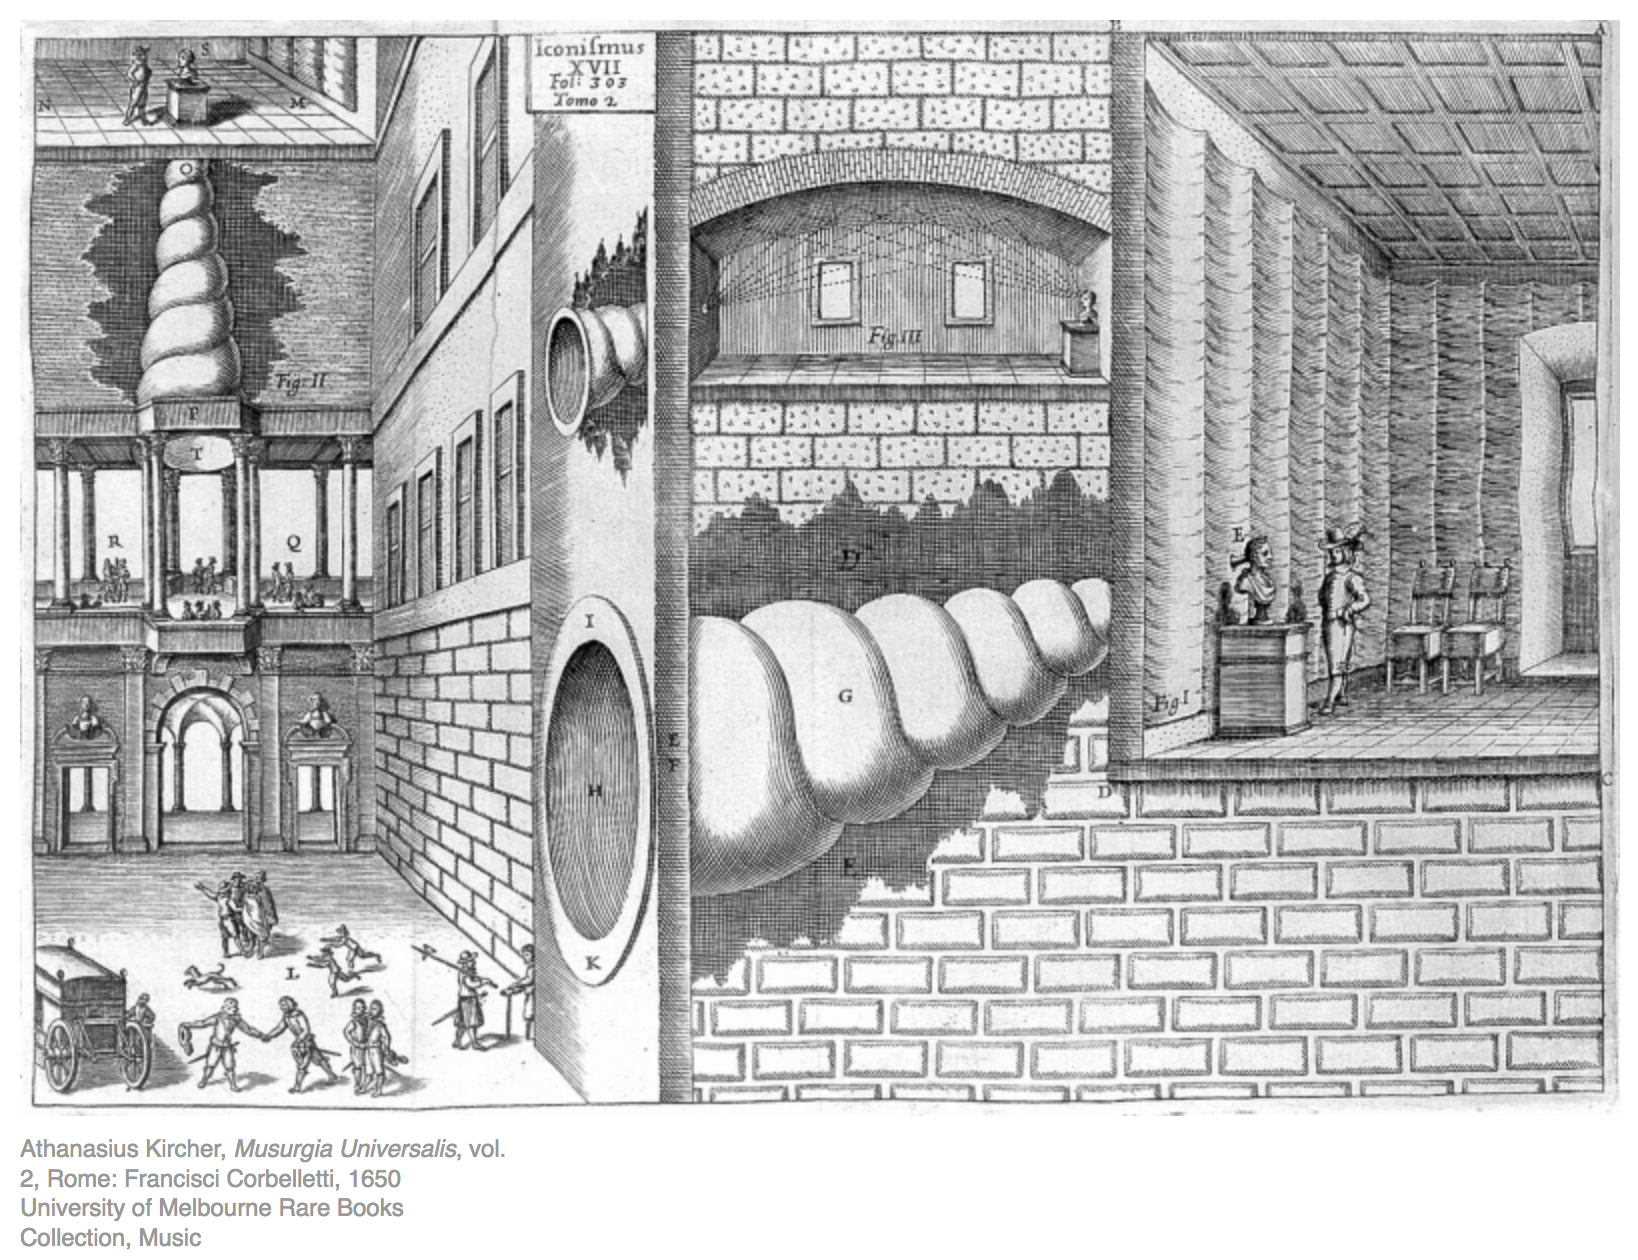

In [5]:
Image('images/eavesdropping.png')

Cite: Stern, J., & Parker, D. (Eds.). (n.d.). Eavesdropping. Retrieved August 20, 2018, from [www.art-museum.unimelb.edu.au/exhibitions/future-exhibitions/exhib-date/2018-07-24/exhib/eavesdropping](http://www.art-museum.unimelb.edu.au/exhibitions/future-exhibitions/exhib-date/2018-07-24/exhib/eavesdropping) - Eavesdropping is a unique collaboration between Liquid Architecture, Melbourne Law School and the Ian Potter Museum of Art, comprising gram, series of working groups and touring event which explores the politics of listening through work by leading artists, researchers, writers and activists from Australia and around the world.

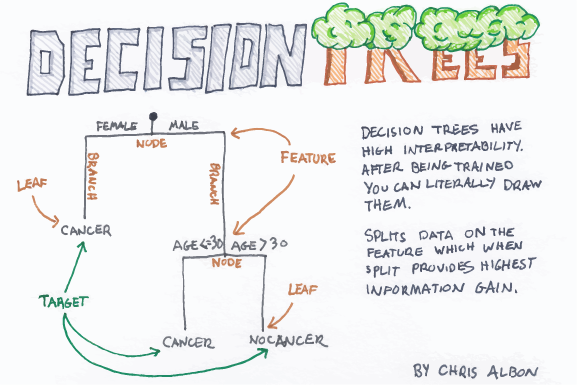

In [6]:
Image('images/Decision_Trees_web.png')

## Entropy and information gain

$$
\large
\text{Entropy:} \;
H(V) = \sum_{k} P(v_k) \log_{2} \left( \frac{1}{P(v_k)} \right) = - \sum_{k} P(v_k) \log_{2} P(v_k)\\
\begin{align}
&V \;\text{random variable}\\
&P \; \text{probability}
\newline
\end{align}
$$

$$
\large
\text{Information Gain:} \; 
IG(S, C) = H(S) - \sum_{k} \frac{\aleph\left({C_i}\right)}{\aleph\left({S}\right)} \log_{2} H(C_i) \\
\begin{align}
&S \; \text{parent node}\\
&C_i \; \text{ith child node}\\
&IG(S, C) \; \text{entropy gain from split}\\
&H(S) \; \text{entropy of }S\\
&H(C_i) \; \text{entropy of } C_i\\
&\aleph\left({C_i}\right) \; \text{number of elements in } C_i\\
&\aleph\left({S}\right) \; \text{number of elements in } S
\end{align}
$$

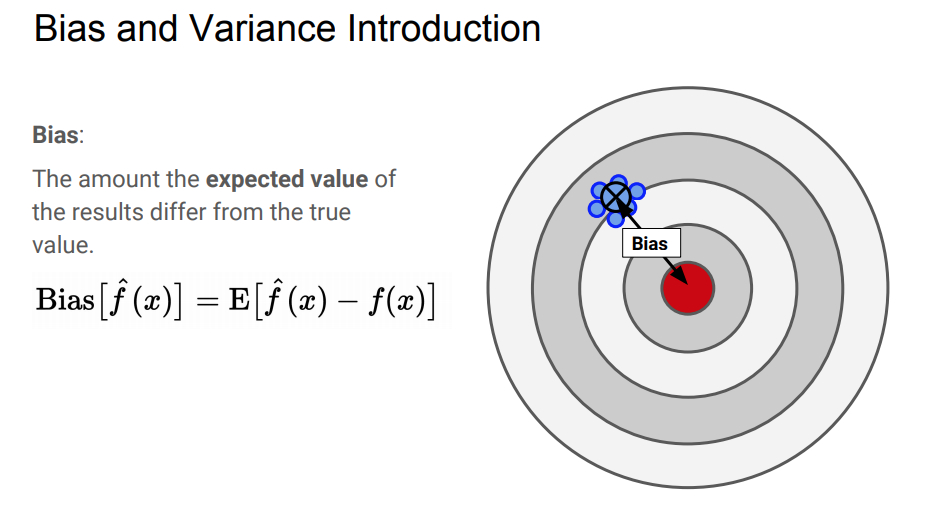

In [7]:
Image('images/bias-equation.png')

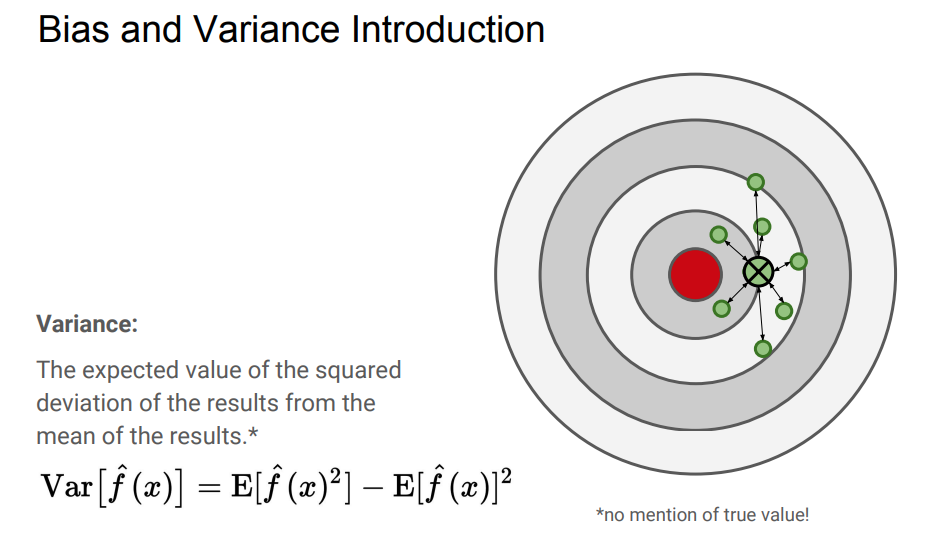

In [8]:
Image('images/variance-equation.png')

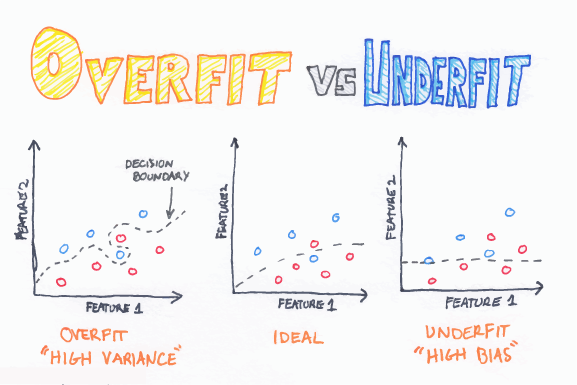

In [9]:
Image('images/Overfit_Vs_Underfit_web.png')

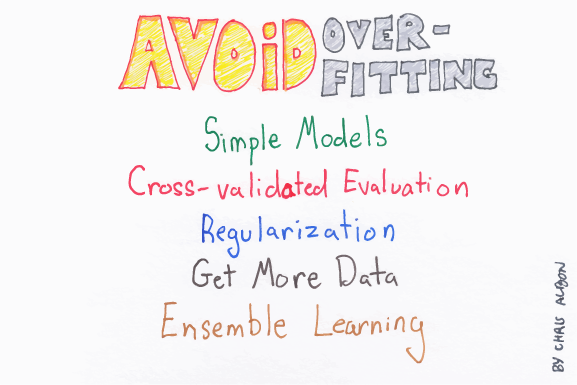

In [10]:
Image('images/Avoid_Overfitting_web.png')

## Decision trees models in Scikit-Learn

In [24]:
# load the breast cancer data set
# see: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
data = datasets.load_wine()
# splits and loads data as numpy arrays
X, y = datasets.load_wine(return_X_y=True)

In [25]:
print('Class labels:', np.unique(data.target_names))

Class labels: ['class_0' 'class_1' 'class_2']


In [26]:
print('Feature names:', data.feature_names)
print('# Features:', len(data.feature_names))

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
# Features: 13


In [27]:
print(X.shape, y.shape)

(178, 13) (178,)


In [28]:
# create our training and testing data sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

### Building an Scikit-Learn DecisionTreeClassifier

Check out the excellent documentation of the Scikit-Learn project
[DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [29]:
# build the tree
TEMP_FILENAME = 'temp.png'
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=4, 
                              random_state=37)

# fit the data 
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=37,
            splitter='best')

In [30]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=data.target_names,
                           feature_names=data.feature_names,
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png(TEMP_FILENAME) 

True

In [31]:
from IPython.display import Image
%matplotlib inline

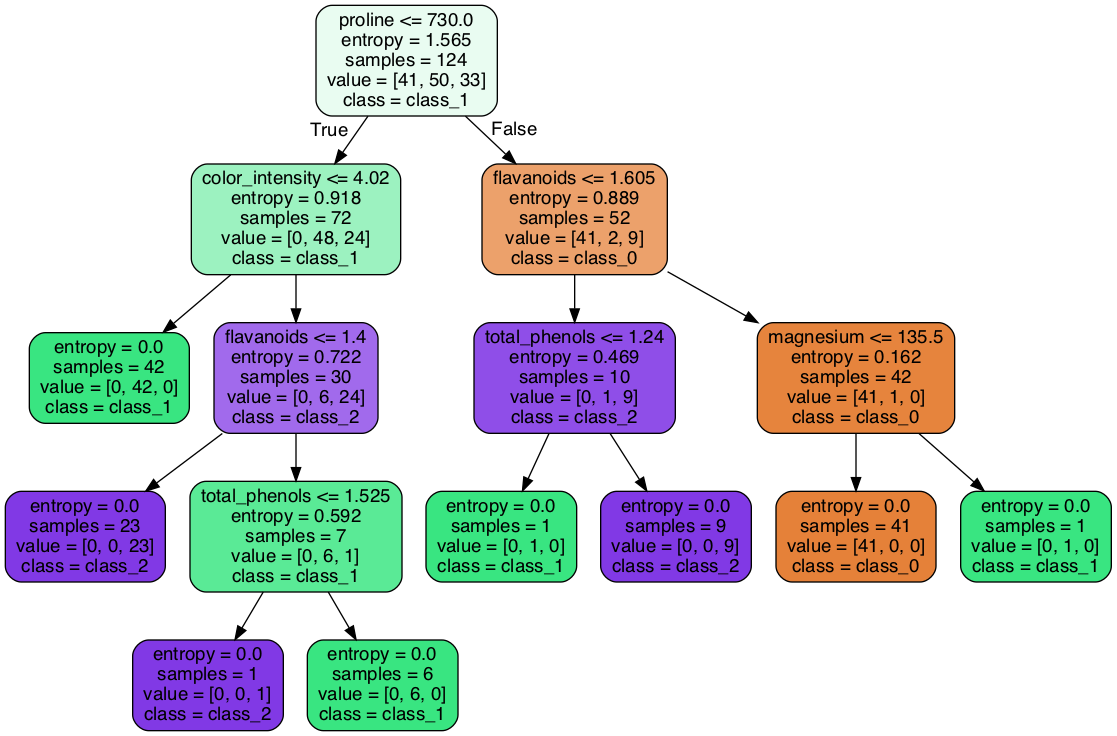

In [32]:
Image(filename=TEMP_FILENAME, width=900) 

### Cross-validation and model performance

In [33]:
from sklearn.model_selection import cross_val_score
tree = DecisionTreeClassifier(criterion='entropy', 
                              min_samples_leaf=4, 
                              random_state=37)
scores = cross_val_score(tree, data.data, data.target, cv=5)
# f-strings are awesome
print(f'{scores.min():.2f}, {scores.mean():.2f}, {scores.max():.2f}')

0.81, 0.91, 1.00


# Quiz / Exercise

_Note: Start with a promise_ 

# Lecture - Learning Objectives

1. Select models that do not perform well, remove them from consideration and those that are left are good-enough or _probably approximately correct_.

1. Summarize the relationship between the number of features in a model and the density of data points. 

1. Illustrate how boosting improves the performance of decision trees through the use of weak learners and decision stumps.


## Key Concepts

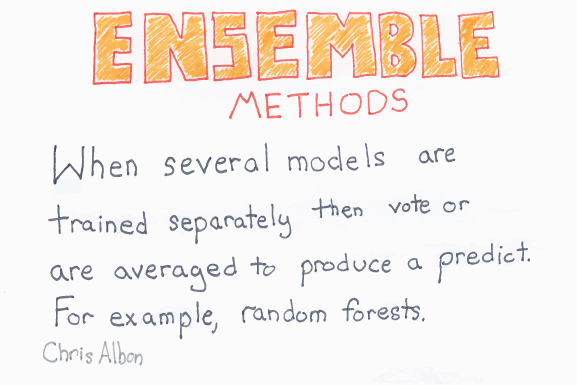

In [34]:
Image('images/Ensemble_Methods_web.png')

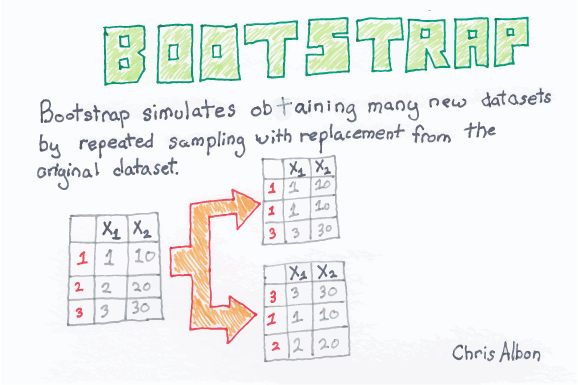

In [35]:
Image('images/Bootstrap_web.png')

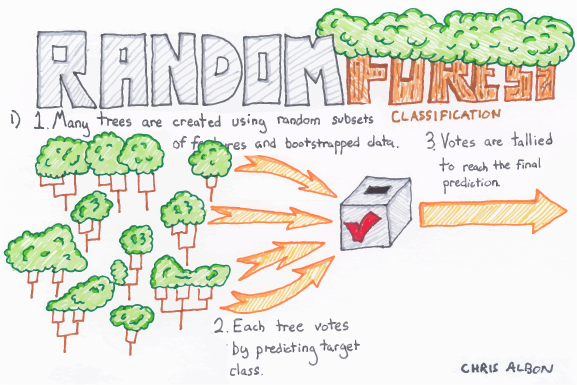

In [36]:
Image('images/Random_Forest_web.png')

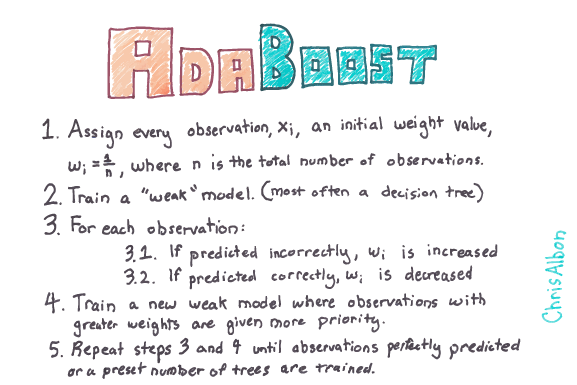

In [37]:
Image('images/AdaBoost_web.png')

## Is an ensemble model really better?

DecisionTree with features [0, 1] has a score of 0.833
RandomForest with 30 estimators with features [0, 1] has a score of 0.927
ExtraTrees with 30 estimators with features [0, 1] has a score of 0.927
AdaBoost with 30 estimators with features [0, 1] has a score of 0.840
DecisionTree with features [0, 2] has a score of 0.980
RandomForest with 30 estimators with features [0, 2] has a score of 0.993
ExtraTrees with 30 estimators with features [0, 2] has a score of 0.993
AdaBoost with 30 estimators with features [0, 2] has a score of 0.993
DecisionTree with features [2, 3] has a score of 0.987
RandomForest with 30 estimators with features [2, 3] has a score of 0.993
ExtraTrees with 30 estimators with features [2, 3] has a score of 0.993
AdaBoost with 30 estimators with features [2, 3] has a score of 0.993


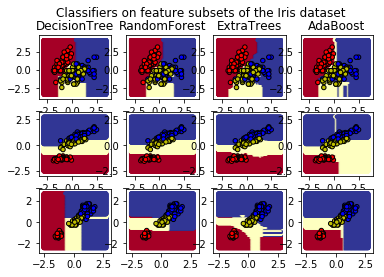

In [42]:
# Cite: Plot the decision surfaces of ensembles of trees on the iris dataset. 
# Retrieved August 20, 2018, from 
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
iris = load_iris()

plot_idx = 1

models = [DecisionTreeClassifier(max_depth=4),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)]

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        clf = clone(model)
        clf = model.fit(X, y)

        scores = clf.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(
            ".")[-1][:-2][:-len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(
                len(model.estimators_))
        print(model_details + " with features", pair,
          "has a score of", '{:.3f}'.format(scores))

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step),
            np.arange(y_min, y_max, plot_step))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                         yy_coarser.ravel()]
                                         ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['r', 'y', 'b']),
                    edgecolor='k', s=20)
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset")
plt.axis("tight")

plt.show()

## More model performance metrics

* Precision = TP / (TP + FP) 
* Recall = TP / (TP + FN)
* F1 = 2 * precision * recall / (precision + recall)

In [47]:
# cite: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

from sklearn.metrics import classification_report, confusion_matrix
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.50      1.00      0.67         1
    class 1       0.00      0.00      0.00         1
    class 2       1.00      0.67      0.80         3

avg / total       0.70      0.60      0.61         5



# Boosting

1. Boosting is the most widely used ensamble method

2. An ensamble method produce a strong learner by combining results of many weak learners
    - Random forests combine many decision tree stumps
    - Boosting is combines any kind of weak models into a strong one
    - In other words, boosting is not specific to decision trees

3. Error rates are used to classify learners
    - Strong learners approach 0
    - Weak learners are less than 0.5 (i.e., slightly better than guessing

4. Boosting is a sequential algrorithm

    1. Initially weights are uniformly distributed and always sum to 1_

    2. Weights are increased on samples that are poorly classified

    3. Train new model using features with newly adjusted weights

    4. New model emphasizes performance on features where previous models failed

    5. Model is added to the ensemble (collection) of models

    6. Continue until the desired number of models have been sequentially trained

5. Models are then weighted based on their accurarcy based on the unweighted training data

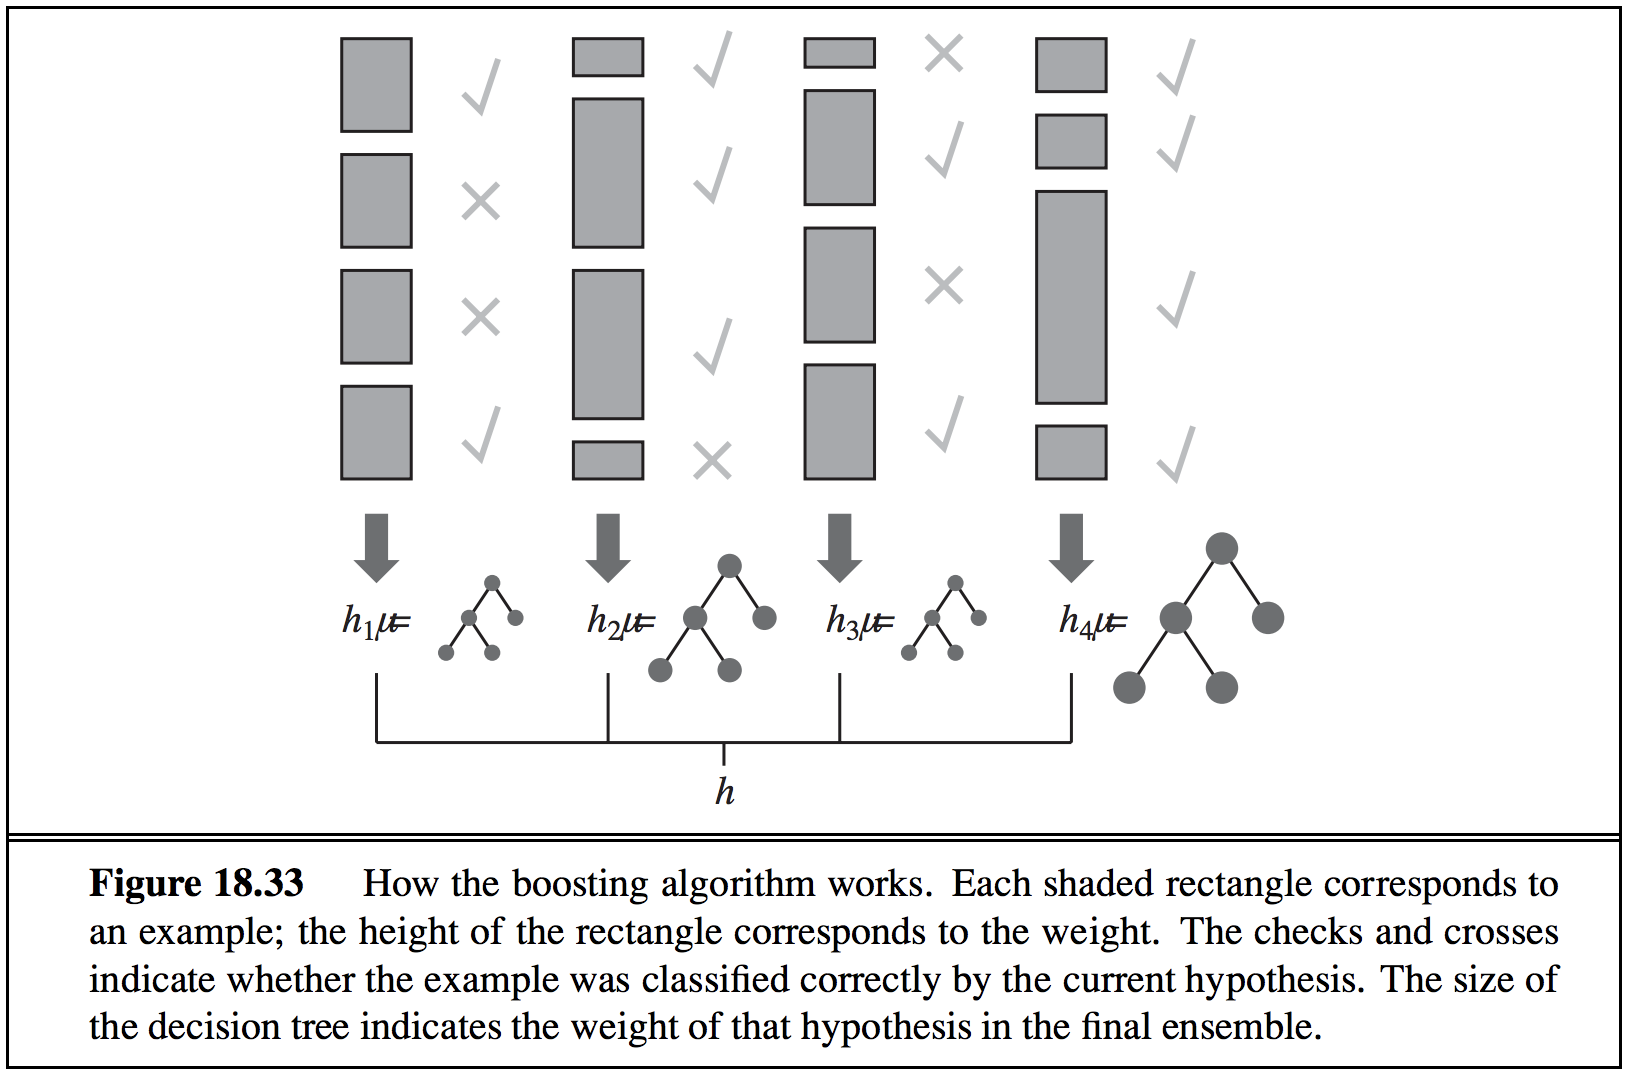

In [52]:
Image('images/Figure-S18-33-boosting.png')

## AdaBoost Algorithm

__function__ ADABOOST(_examples_, _L_, _K_) __returns__ a weighted\-majority hypothesis  
&emsp;__inputs__: _examples_, set of _N_ labeled examples (_x<sub>1</sub>_, _y<sub>1</sub>_),&hellip;,(_x<sub>N</sub>_,_y<sub>N</sub>_)  
&emsp;&emsp;&emsp;&emsp;_L_, a learning algorithm  
&emsp;&emsp;&emsp;&emsp;_K_, the number of hypotheses in the ensemble  
&emsp;__local variables__: __w__, a vector of _N_ example weights, initially 1 &frasl; _N_  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;__h__, a vector of _K_ hypotheses  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;__z__, a vector of _K_ hypothesis weights  

&emsp;__for__ _k_ = 1 __to__ _K_ __do__  
&emsp;&emsp;&emsp;__h__\[_k_\] &larr; _L_(_examples_, __w__)  
&emsp;&emsp;&emsp;_error_ &larr; 0  
&emsp;&emsp;&emsp;__for__ _j_ = 1 __to__ _N_ __do__  
&emsp;&emsp;&emsp;&emsp;&emsp;__if__ __h__\[_k_\](_x<sub>j</sub>_) &ne; _y<sub>j</sub>_ __then__ _error_ &larr; _error_ &plus; __w__\[_j_\]  
&emsp;&emsp;&emsp;__for__ _j_ = 1 __to__ _N_ __do__  
&emsp;&emsp;&emsp;&emsp;&emsp;__if__ __h__\[_k_\](_x<sub>j</sub>_) = _y<sub>j</sub>_ __then__ __w__\[_j_\] &larr; __w__\[_j_\] &middot; _error_ &frasl; (1 &minus; _error_)  
&emsp;&emsp;&emsp;__w__ &larr; NORMALIZE(__w__)  
&emsp;&emsp;&emsp;__Z__\[_k_\] &larr; log(1 &minus; _error_) &frasl; _error_  
&emsp; __return__ WEIGHTED\-MAJORITY(__h__, __z__)  

---
__Figure ??__ The ADABOOST variant of the boosting method for ensemble learning. The algorithm generates hypothesis by successively reweighting the training examples. The function WEIGHTED\-MAJORITY generates a hypothesis that returns the output value with the highest vote from the hypotheses in __h__, with votes weighted by __z__.


# Citations

1. Flashcards: Albon, C. (2018, March 21). Chrisalbon/MachineLearningFlashcards.com. Retrieved August 19, 2018, from [github.com/chrisalbon/MachineLearningFlashcards.com](https://github.com/chrisalbon/MachineLearningFlashcards.com)
The website for the machine learning flashcards project.

3. Textbook figures: Stuart Russel and Peter Norvig. _Artificial Intelligence: A Modern Approach_ (3rd ed). Prentice-Hall. 2010. Chapter 18 - Learning from Examples. pp 693-757.

# Break 

![]()

# Demonstration

# Exercise

_Note: End with humor_